In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import VotingClassifier # 과반수 투표(Majority Voting) 
from sklearn.ensemble import BaggingClassifier # 배깅(Bagging) 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [5]:
covid = pd.read_csv("./data/Covid Dataset.csv")
covid

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No


In [6]:
# 라벨 인코더 생성 및 적용
label_encoder = LabelEncoder()

for column in covid.columns:
    covid[column] = label_encoder.fit_transform(covid[column])

In [7]:
covid

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
5430,1,1,1,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
5431,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5432,1,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
covid.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [9]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Breathing Problem                        5434 non-null   int32
 1   Fever                                    5434 non-null   int32
 2   Dry Cough                                5434 non-null   int32
 3   Sore throat                              5434 non-null   int32
 4   Running Nose                             5434 non-null   int32
 5   Asthma                                   5434 non-null   int32
 6   Chronic Lung Disease                     5434 non-null   int32
 7   Headache                                 5434 non-null   int32
 8   Heart Disease                            5434 non-null   int32
 9   Diabetes                                 5434 non-null   int32
 10  Hyper Tension                            5434 non-null   int32
 11  Fati

In [10]:
covid['Wearing Masks'].value_counts()

Wearing Masks
0    5434
Name: count, dtype: int64

## 시각화


In [11]:
# fig = plt.figure(figsize=(10, 10))

# ax1 = fig.add_subplot(3, 3, 1)
# ax2 = fig.add_subplot(3, 3, 2)
# ax3 = fig.add_subplot(3, 3, 3)
# ax4 = fig.add_subplot(3, 3, 4)
# ax5 = fig.add_subplot(3, 3, 5)
# ax6 = fig.add_subplot(3, 3, 6)
# ax7 = fig.add_subplot(3, 3, 7)
# ax8 = fig.add_subplot(3, 3, 8)

# sns.histplot(covid, x="corona_result", hue="cough", multiple="dodge", ax=ax1)
# sns.histplot(covid, x="corona_result", hue="fever", multiple="dodge", ax=ax2)
# sns.histplot(covid, x="corona_result", hue="sore_throat", multiple="dodge", ax=ax3)
# sns.histplot(
#     covid, x="corona_result", hue="shortness_of_breath", multiple="dodge", ax=ax4
# )
# sns.histplot(covid, x="corona_result", hue="head_ache", multiple="dodge", ax=ax5)
# sns.histplot(covid, x="corona_result", hue="age_60_and_above", multiple="dodge", ax=ax6)
# sns.histplot(covid, x="corona_result", hue="gender", multiple="dodge", ax=ax7)
# sns.histplot(covid, x="corona_result", hue="test_indication", multiple="dodge", ax=ax8)

# plt.tight_layout()
# plt.show()

## 전처리


In [12]:
corr_mat = covid.corr()

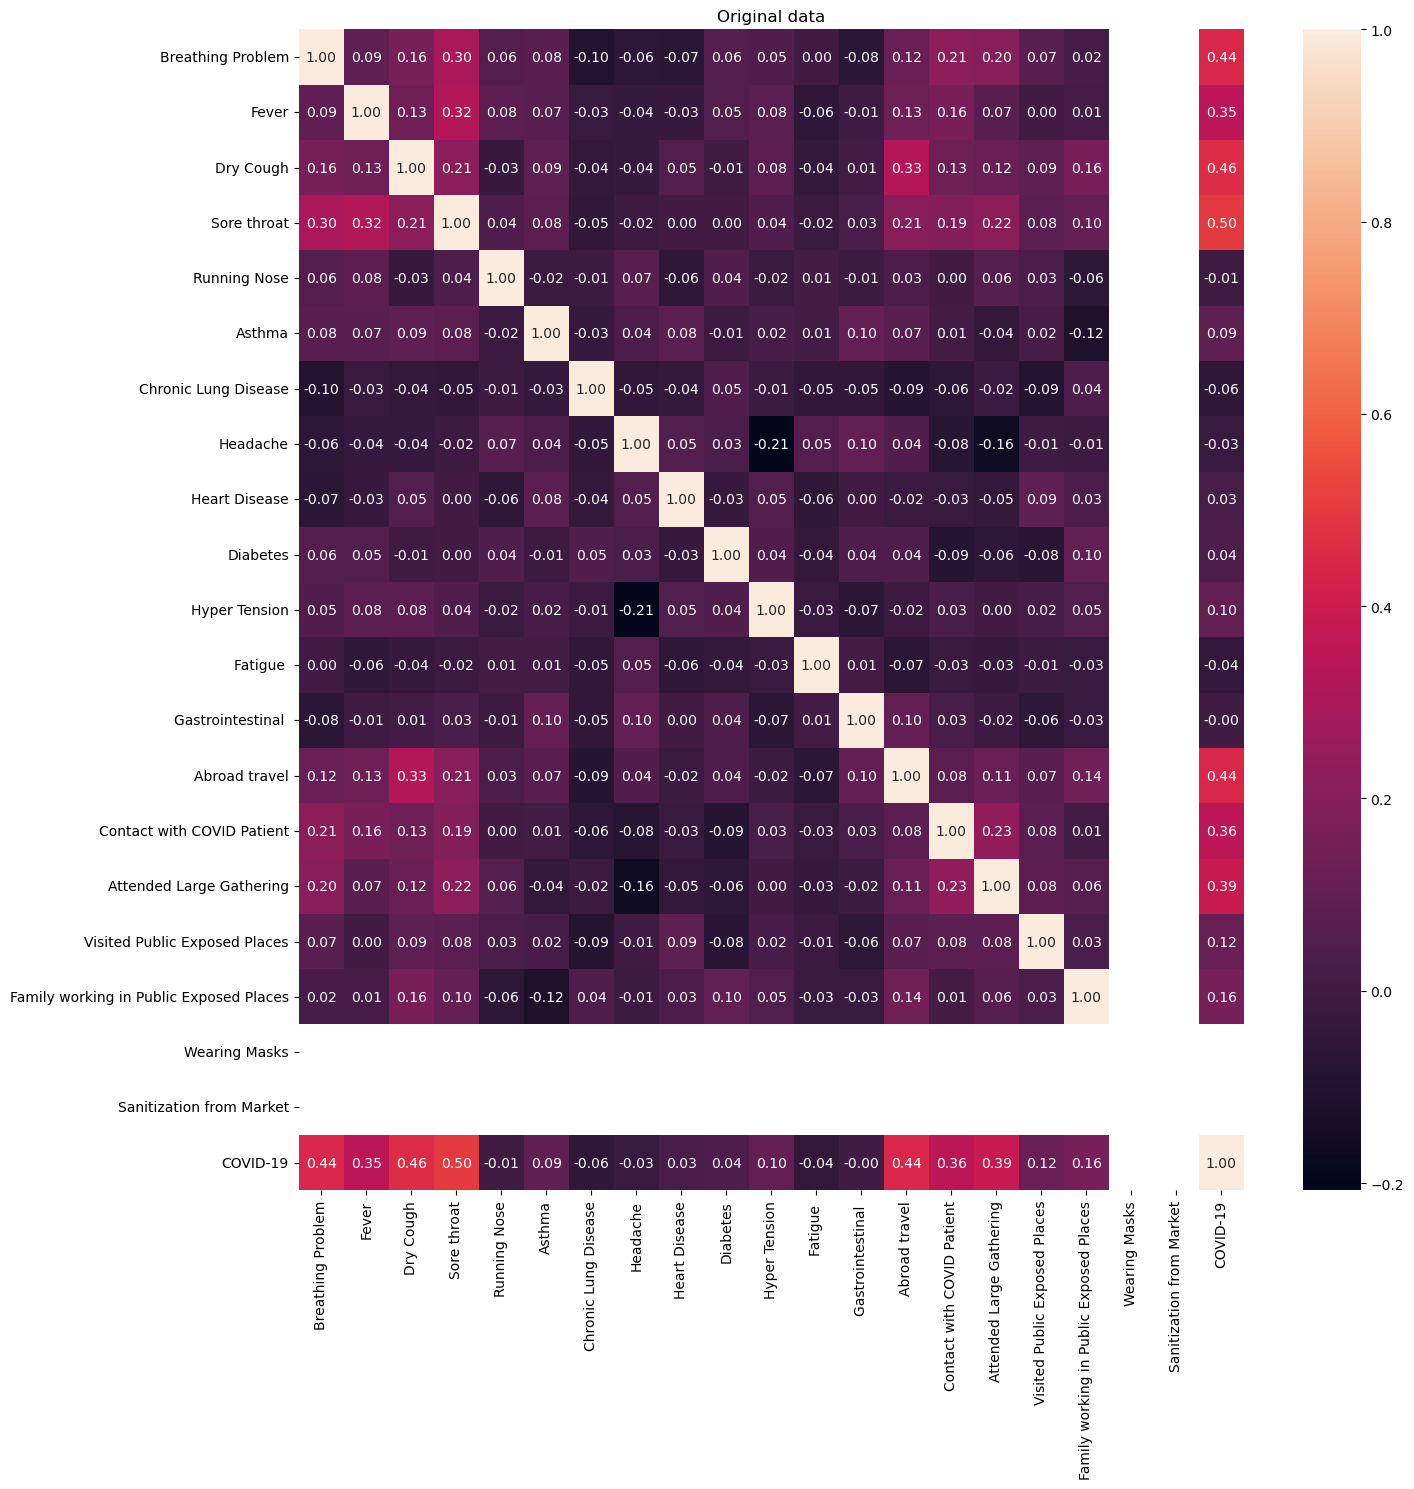

In [13]:
fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(1,1,1)

sns.heatmap(corr_mat, annot=True, fmt=".2f", ax=ax1)

ax1.set_title("Original data")
plt.tight_layout()
plt.show()

In [14]:
covid.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [15]:
data = covid.loc[:, ['Breathing Problem', 'Fever', 'Dry Cough',
                            'Sore throat', 'Abroad travel', 'Contact with COVID Patient', 'Attended Large Gathering']]
target = covid.loc[:, ['COVID-19']]

In [16]:
target = target['COVID-19'].astype(str)

## 데이터 분리

In [17]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, stratify=target)

In [18]:
print(x_train.shape, x_test.shape)

(4347, 7) (1087, 7)


## 모델 학습

In [19]:
logi = LogisticRegression(max_iter=500)
tree = DecisionTreeClassifier()

In [20]:
models = [('ada', AdaBoostClassifier(logi)),
          ('bc', BaggingClassifier(tree)),
          ('rfc', RandomForestClassifier()),
          ('knn', KNeighborsClassifier()),
          ('xgb', XGBClassifier()),
          ('lgbm', LGBMClassifier()),
          ('dtc', DecisionTreeClassifier()),
          ('logi', LogisticRegression())]
vote = VotingClassifier(models, voting='soft')
vote.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3506, number of negative: 841
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001975 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14
[LightGBM] [Info] Number of data points in the train set: 4347, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.806533 -> initscore=1.427639
[LightGBM] [Info] Start training from score 1.427639
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

VotingClassifier(estimators=[('ada',
                              AdaBoostClassifier(estimator=LogisticRegression(max_iter=500))),
                             ('bc',
                              BaggingClassifier(estimator=DecisionTreeClassifier())),
                             ('rfc', RandomForestClassifier()),
                             ('knn', KNeighborsClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytre...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                             ('lgbm', LGBMClassifier()),
                             ('dtc', DecisionTreeClassifier()),
                             ('logi', LogisticRegression())],
                 voting='soft')

In [22]:
pred = vote.predict(x_test)

In [23]:
pd.DataFrame(pred).value_counts()

1    907
0    180
Name: count, dtype: int64

In [24]:
y_test.value_counts()

COVID-19
1    877
0    210
Name: count, dtype: int64

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
acc_score = accuracy_score(pred, y_test)
acc_score

0.9705611775528978